<a href="https://colab.research.google.com/github/JunSeokCheon/dacon_sign_language_classification/blob/master/model_fit%26predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/kaggle_study/sign_Languague

/content/drive/MyDrive/kaggle_study/sign_Languague


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import PIL
from tqdm.notebook import tqdm

from glob import glob
from google.colab import drive

In [4]:
agumeted_train = np.load('agumeted_train.npy')
agumeted_val = np.load('agumeted_val.npy')
agumeted_train_y = np.load('agumeted_train_y.npy')
agumeted_val_y = np.load('agumeted_val_y.npy')
X_test = np.load("X_test.npy")
submission = pd.read_csv('data/sample_submission.csv')

In [5]:
from tensorflow.keras import layers

IMG_SIZE = 128

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE), 
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.3),
  # layers.Normalization(axis=-1, mean=None, variance=None)
])

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
  # layers.Normalization(axis=-1, mean=None, variance=None)
])

In [8]:
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(weights=None, include_top = False, input_shape=(128,128,3))

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

In [10]:
def build_model():
  model = Sequential()
  model.add(vgg_base)

  model.add(Flatten())

  model.add(Dense(128,activation="relu",kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(32,activation="relu",kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(11, activation="softmax"))

  # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                      

In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

In [8]:
# def build_model():

#   inputs = tf.keras.layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

#   outputs = Conv2D(32,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(inputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = MaxPool2D((2,2))(outputs)

#   outputs = Conv2D(64,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = MaxPool2D((2,2))(outputs)

#   outputs = Conv2D(128,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = MaxPool2D((2,2))(outputs)

#   outputs = Conv2D(256,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = MaxPool2D((2,2))(outputs)

#   outputs = Conv2D(512,(3,3),activation=None,padding='same',kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = MaxPool2D((2,2))(outputs)

#   outputs = GlobalAveragePooling2D()(outputs)
#   # outputs = Flatten()(outputs)

#   outputs = Dense(128,activation=None,kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = Dropout(0.5)(outputs)

#   outputs = Dense(32,activation=None,kernel_initializer='he_normal')(outputs)
#   outputs = BatchNormalization()(outputs)
#   outputs = ReLU()(outputs)
#   outputs = Dropout(0.5)(outputs)

#   outputs = Dense(11,activation='softmax')(outputs)
#   model = Model(inputs=inputs, outputs=outputs)

#   # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#   model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
  
#   return model

# model = build_model()
# model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496 

In [11]:
filepath= "saved/weights.best_1.hdf5"

callbacks = [
            #  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1),
             tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
             ]

             
history = model.fit(agumeted_train, agumeted_train_y,
          batch_size=32,
          epochs=50,
          validation_data=(agumeted_val,agumeted_val_y),
          callbacks=callbacks
          )

Epoch 1/50
558/558 [==============================] - ETA: 0s - loss: 2.7503 - accuracy: 0.1062
Epoch 1: val_loss improved from inf to 4.13284, saving model to saved/weights.best_1.hdf5
558/558 [==============================] - 61s 85ms/step - loss: 2.7503 - accuracy: 0.1062 - val_loss: 4.1328 - val_accuracy: 0.0872
Epoch 2/50
557/558 [============================>.] - ETA: 0s - loss: 2.2324 - accuracy: 0.1716
Epoch 2: val_loss improved from 4.13284 to 2.68711, saving model to saved/weights.best_1.hdf5
558/558 [==============================] - 47s 85ms/step - loss: 2.2324 - accuracy: 0.1716 - val_loss: 2.6871 - val_accuracy: 0.1337
Epoch 3/50
557/558 [============================>.] - ETA: 0s - loss: 1.8962 - accuracy: 0.2614
Epoch 3: val_loss improved from 2.68711 to 1.68019, saving model to saved/weights.best_1.hdf5
558/558 [==============================] - 48s 86ms/step - loss: 1.8961 - accuracy: 0.2617 - val_loss: 1.6802 - val_accuracy: 0.3256
Epoch 4/50
557/558 [===============

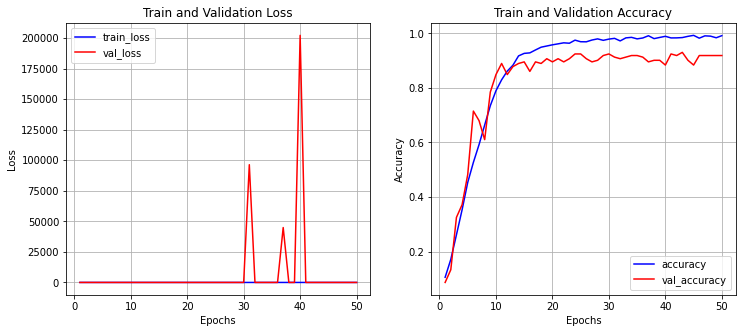

In [12]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
model.load_weights("saved/weights.best_1.hdf5")
model.evaluate(agumeted_val, agumeted_val_y)

6/6 [==============================] - 0s 28ms/step - loss: 0.4647 - accuracy: 0.8779


[0.4646913409233093, 0.8779069781303406]

In [14]:
test_re = resize_and_rescale(X_test)
preds = model.predict(test_re)

submission['label'] = np.argmax(preds, axis=1)
submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'
submission['label'][submission['label'] == 0] = '10-2' ## Label : 0 -> '10-2'
submission['label'] = submission['label'].apply(lambda x : str(x)) ## Dtype : int -> object

submission.to_csv('./keras_VGG16_epoch50.csv', index=False) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
